# Вставка в std::set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import subprocess

In [92]:
def startTest(size: int, count: int = 25) -> list:
    global path, executableName
    results = []
    for _ in range(count):
        result = subprocess.Popen([path+executableName, str(size)], stdout = subprocess.PIPE)
        stdout, stderr = result.communicate()
        results.append(int(stdout.decode('utf-8').split(' ')[1]))
    return results

In [21]:
path = r'/home/vladimir/BOTAY!/CplusplusHOMEWORK/lesson_2_4/task1_part1/'
executableName = r'appendN'

In [65]:
sizeList = np.linspace(int(1e2), int(1e6), 20, dtype = np.int64)
testResults = np.array([startTest(size) for size in sizeList])

In [62]:
def ONLogN(n: np.ndarray, O: float):
    return O*n*np.log2(n)

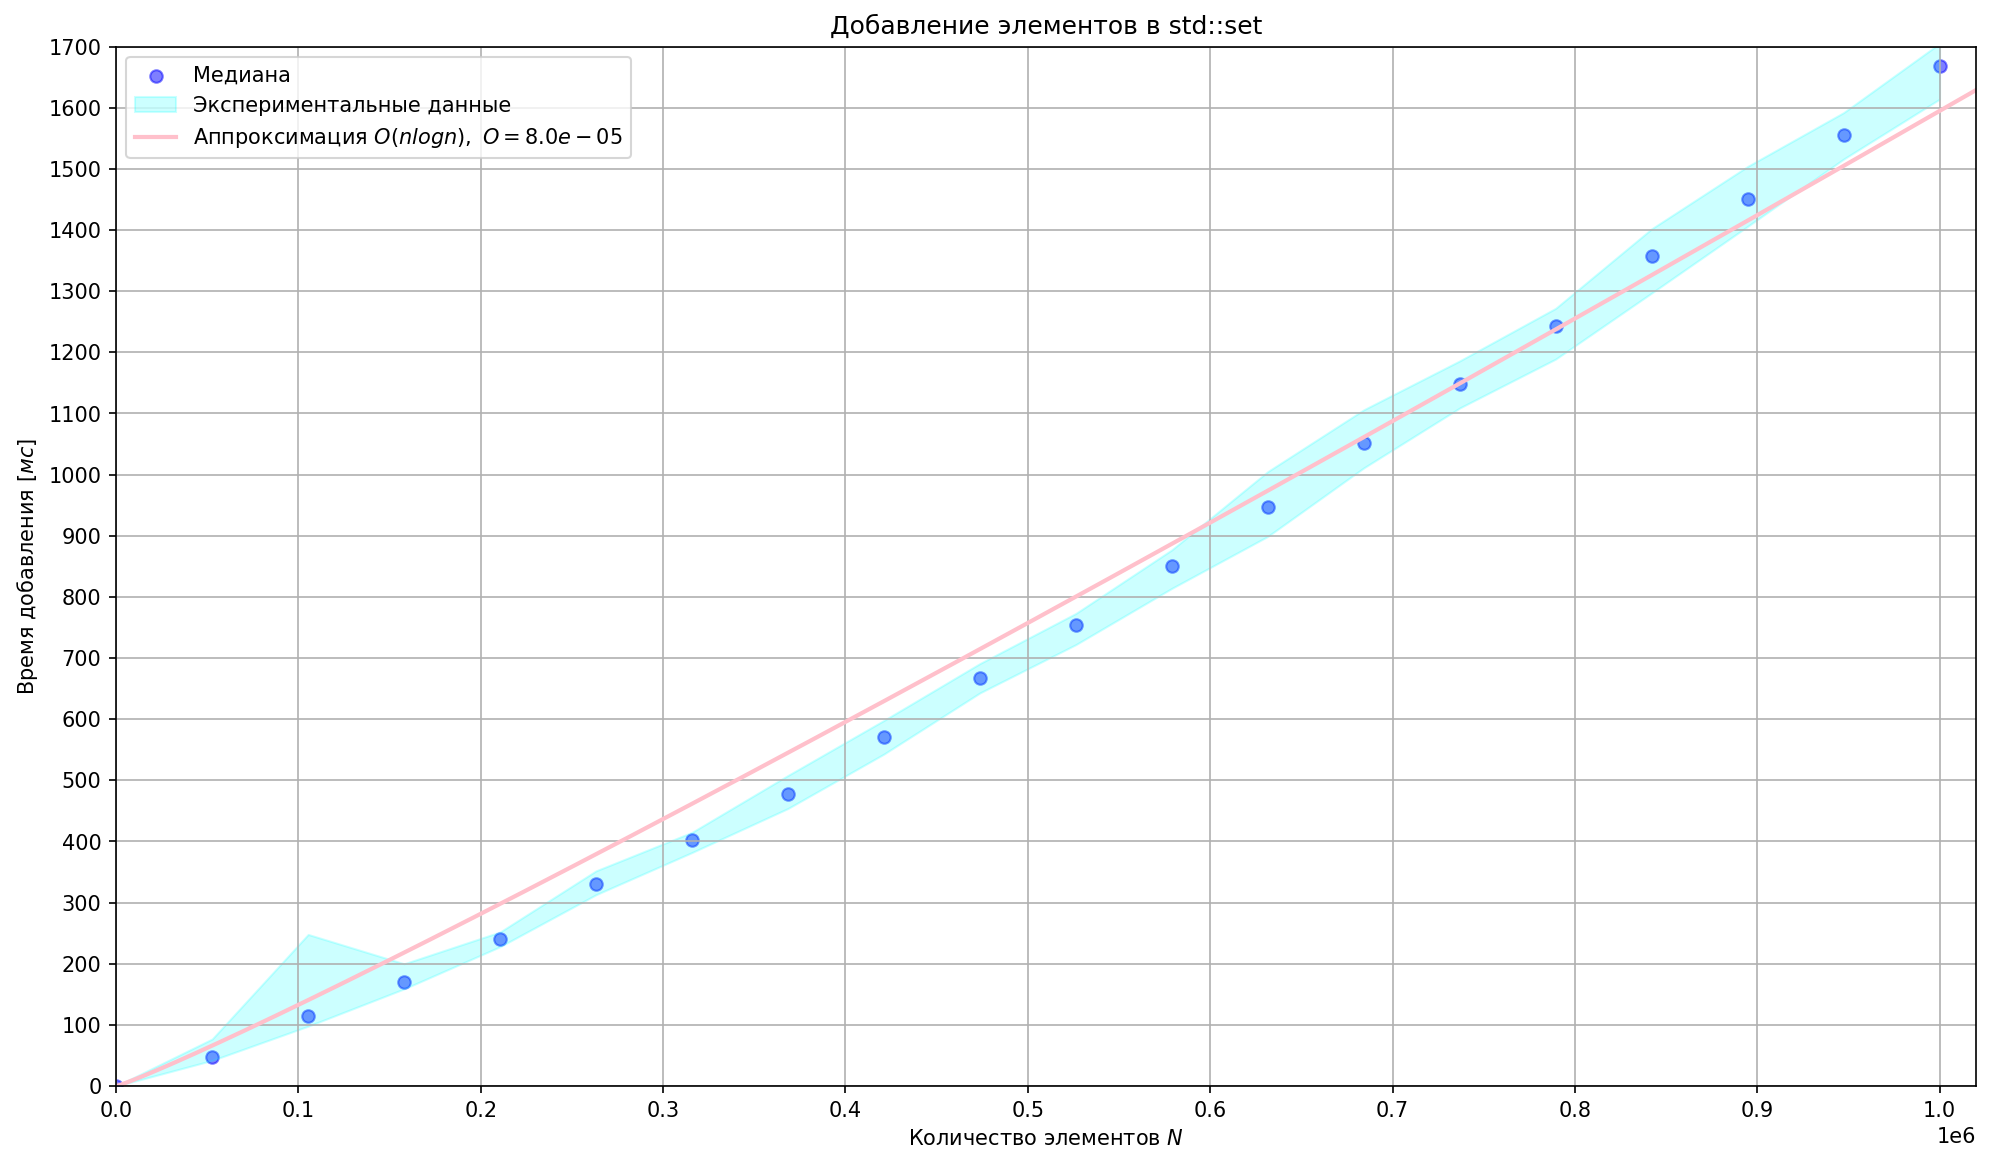

In [94]:
medianTime = np.median(testResults, axis = 1)
maxValues = np.max(testResults, axis = 1)
minValues = np.min(testResults, axis = 1)

leftShift = int(1e5) / 5

xAx = np.linspace(min(sizeList), max(sizeList) + leftShift, 2000)
param, _ = curve_fit(ONLogN, sizeList, medianTime, p0 = [0.2])

plt.figure(figsize = (16, 9), dpi = 150)

plt.scatter(sizeList, 
            medianTime, 
            color = 'blue',
            alpha = 0.5,
            label = 'Медиана')

plt.fill_between(sizeList, 
                 maxValues, 
                 minValues, 
                 alpha = 0.2, 
                 color = 'aqua',
                 label = 'Экспериментальные данные')

plt.plot(xAx, 
         ONLogN(xAx, param[0]), 
         color = 'pink', 
         linewidth = 2,
         label = r"Аппроксимация $O(nlogn), \ O = {:0.1e}$".format(param[0]))

plt.xlabel("Количество элементов $N$")
plt.ylabel("Время добавления $[мс]$")
plt.legend()
plt.title("Добавление элементов в std::set");
plt.grid()
plt.xlim(0, max(sizeList) + leftShift)
plt.ylim(0, 1700)
plt.yticks(np.arange(0, 1750, 100))
plt.xticks(np.arange(0, 1.1, 0.1) * 1e6)
plt.savefig("set_append.png")